## Sources

- https://www.kaggle.com/code/prashant111/naive-bayes-classifier-in-python

## Naive Bayes Variants

### Gaussian Naive Bayes

- for continous attributes that are distributed according to a gaussian distribution $\rightarrow$ not appropriate

### Bernoulli  Naive Bayes

- features are boolean variables $\rightarrow$ not appropriate

### Multinomial Naive Bayes

- handle continous attributes with
    - discretization
    - assume a certain probability distribution and estimate the parameters

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



In [2]:
plt.rcParams['figure.figsize'] = [4, 3]

In [3]:
df = pd.read_excel('../data/existing-customers.xlsx')

C:\Users\gta\PycharmProjects\data-mining\.venv\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [4]:
df.head()

,RowID,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,Row0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,Row1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,Row2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,Row3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,Row4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


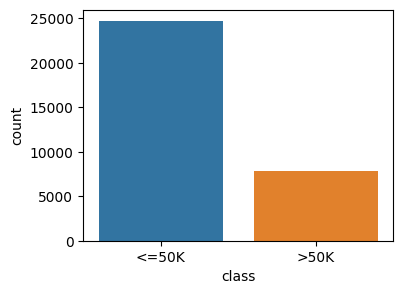

In [5]:
sns.countplot(df, x='class');

### Imbalanced Dataset $\rightarrow$ Random Oversampling

In [7]:
from sklearn.utils import resample

df_majority = df[df['class'] == '<=50K']
df_minority = df[df['class'] == '>50K']

df_minority_upsampled = resample(df_minority, 
                                 replace=True,
                                 n_samples=len(df_majority),
                                 random_state=2)

df_upsampled = pd.concat([df_majority, df_minority_upsampled])

In [ ]:
sns.countplot(df_upsampled, x='class');

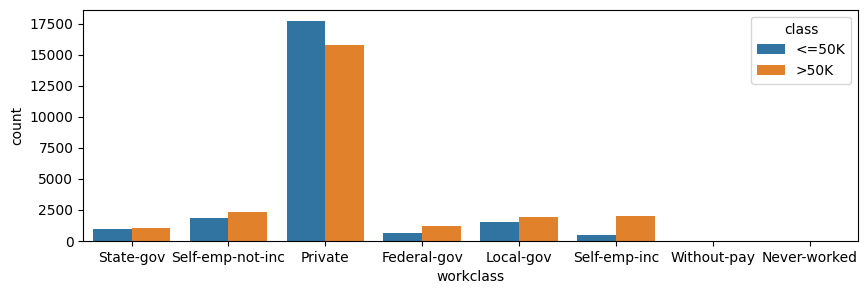

In [24]:
plt.figure(figsize=(10, 3))
sns.countplot(df_upsampled, x='workclass', hue='class');